In [68]:
import pandas as pd
import numpy as np

import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
mpl.rcParams['image.cmap'] = 'hot_r'

%matplotlib inline

In [69]:
! ls -lrth hg*

-rw-r--r--  1 artur  staff   587K Nov 28 15:29 hgcal_calibration_config1_oct2018_fromOctTB.txt
-rw-r--r--  1 artur  staff   485K Nov 29 10:11 hgcal_calibration_October2018_JuneCalibForEE.txt
-rw-r--r--  1 artur  staff   589K Nov 29 15:52 hgcal_calibration_config1_oct2018_fromOctTB_v2.txt


In [70]:
## June EE calib
#fname = "hgcal_calibration_October2018_JuneCalibForEE.txt"
fname = "hgcal_calibration_config1_oct2018_fromOctTB.txt"
df_calib_june = pd.read_csv(fname, delim_whitespace=True)

## October calib
fname = "hgcal_calibration_config1_oct2018_fromOctTB_v2.txt"
df_calib_oct = pd.read_csv(fname, delim_whitespace=True)

In [71]:
# remove # from col names
calib_cols = df_calib_june.columns.values
calib_cols =  np.array([col.replace('#',"") for col in calib_cols])
df_calib_june.columns = calib_cols

In [72]:
df_calib_june.head()

Module_ID  ASIC_ID  Channel  ADC_To_MIP  LowGain_To_HighGain_Transition  \
0         78        0        0    0.022331                         1981.94   
1         78        0        2    0.023343                         2199.04   
2         78        0        4    0.024160                         2425.46   
3         78        0        6    0.022873                         1574.05   
4         78        0        8    0.023883                         1861.80   

   LowGain_To_HighGain_Conversion  TOT_To_LowGain_Transition  \
0                         6.97446                     1200.0   
1                         7.15292                     1200.0   
2                         7.09049                     1200.0   
3                         6.42506                     1200.0   
4                         7.71961                     1200.0   

   TOT_To_LowGain_Conversion  TOT_Offset  Fully_calibrated  
0                        5.0       180.0                 0  
1                        5.0       180.0                 0  
2                        5.0       180.0                 0  
3                        5.0       180.0                 0  
4                        5.0       180.0                 0

In [73]:
df_calib_oct.head()

Module_ID  ASIC_ID  Channel  ADC_To_MIP  LowGain_To_HighGain_Transition  \
0         78        0        0    0.022331                         1981.94   
1         78        0        2    0.023343                         2199.04   
2         78        0        4    0.024160                         2425.46   
3         78        0        6    0.022873                         1574.05   
4         78        0        8    0.023883                         1861.80   

   LowGain_To_HighGain_Conversion  TOT_To_LowGain_Transition  \
0                         6.97446                     1200.0   
1                         7.15292                     1200.0   
2                         7.09049                     1200.0   
3                         6.42506                     1200.0   
4                         7.71961                     1200.0   

   TOT_To_LowGain_Conversion  TOT_Offset  Fully_calibrated  
0                        5.0       180.0                 0  
1                        5.0       180.0                 0  
2                        5.0       180.0                 0  
3                        5.0       180.0                 0  
4                        5.0       180.0                 0

In [74]:
len(df_calib_oct['Module_ID'].unique())

94

In [75]:
df_calib_june['Module_ID'].unique()

array([ 78,  90,  89,  88,  77,  85,  84,  32,  69,  79,  76,  83,  70,
        73,  86,  87,  82,  72,  67,  65,  35,  36,  44,  51, 142, 143,
       145, 144, 115,  40, 101,  96,  98,  95, 105, 122, 104, 100, 106,
       123,  34, 113,  99, 121, 114,  94,  97, 111,  37, 124, 108, 109,
       102, 118, 107, 120, 141, 147, 137, 139, 136, 140, 138,  91, 130,
       133, 131, 134, 132, 146, 125, 129, 128, 119, 127, 126, 135,  38,
        39,  42,  45,  53,  46,  48,  75,  59,  71,  64,  55,  63,  66,
        62,  54,  43])

In [76]:
len(df_calib_june['Module_ID'].unique())

94

In [77]:
for df in [df_calib_june, df_calib_oct]:
    df['chan_id'] = df['Module_ID'] * 1e6 + df['ASIC_ID'] * 1e3 + df['Channel']
    df.set_index('chan_id',inplace = True)

In [78]:
df_comb = df_calib_june.join(df_calib_oct, lsuffix = '_june', rsuffix='_oct')

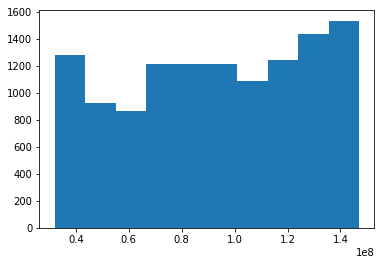

In [79]:
r = plt.hist(df_calib_june.index)

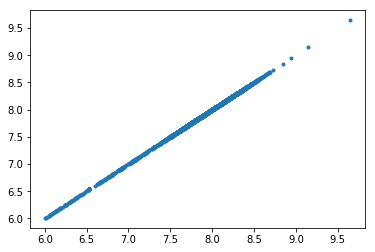

In [80]:
plt.plot(df_comb.LowGain_To_HighGain_Conversion_june, df_comb.LowGain_To_HighGain_Conversion_oct, '.')

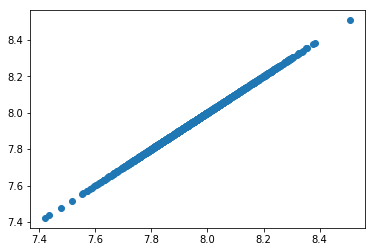

In [81]:
sel = (df_comb.Fully_calibrated_oct == 1) & (df_comb.Fully_calibrated_june == 1)
plt.plot(df_comb[sel].LowGain_To_HighGain_Conversion_june, df_comb[sel].LowGain_To_HighGain_Conversion_oct, 'o')

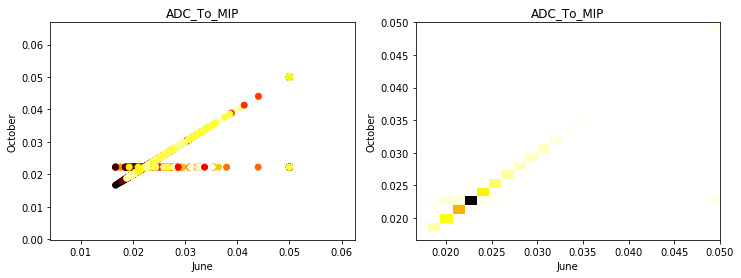

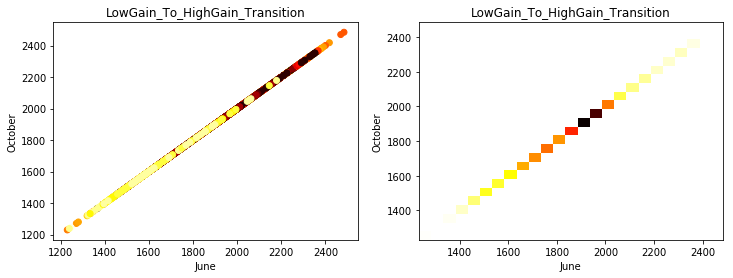

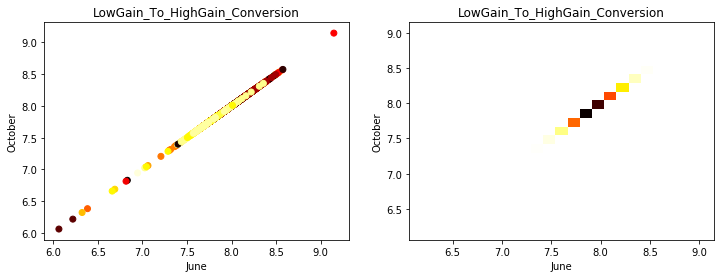

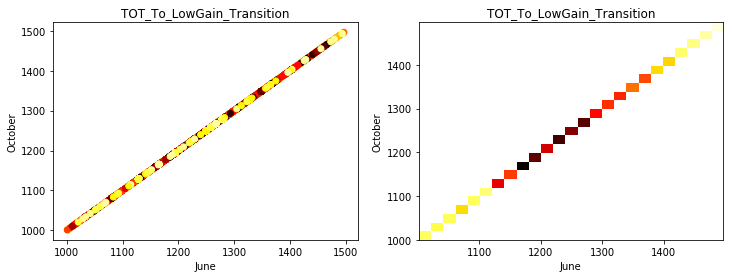

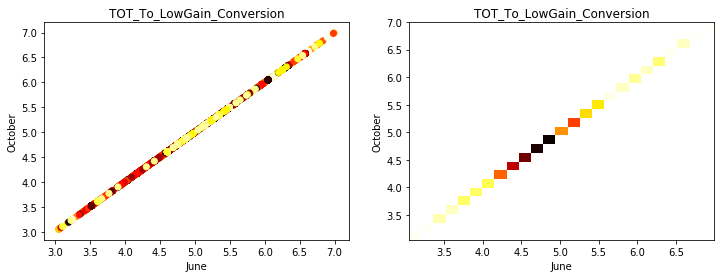

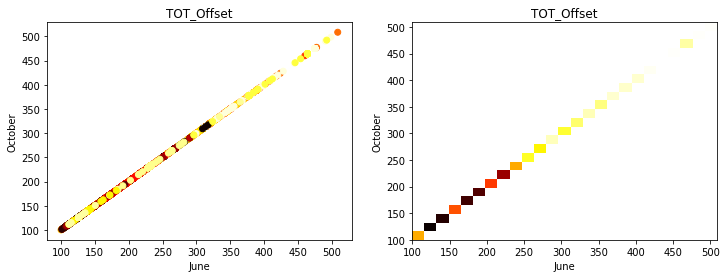

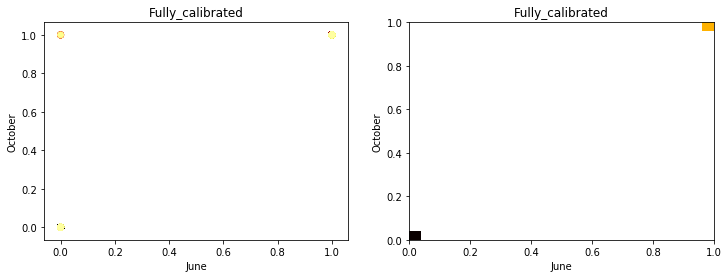

In [82]:
#sel = (df_comb.Fully_calibrated_oct == 1) & (df_comb.Fully_calibrated_june == 1)
sel = (df_comb['TOT_To_LowGain_Transition_oct'] != 1200) & (df_comb['TOT_To_LowGain_Transition_june'] != 2000)
df = df_comb[sel]

for col in calib_cols[3:]:


    plt.figure(figsize = (12,4))
    
    plt.subplot(121)
    plt.scatter(df[col + '_june'], df[col + '_oct'], c = df['Module_ID_june'])
    plt.title(col)
    plt.xlabel('June')
    plt.ylabel('October')
    
    plt.subplot(122)
    plt.hist2d(df[col + '_june'], df[col + '_oct'], 25)
    plt.title(col)
    plt.xlabel('June')
    plt.ylabel('October')